In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
train_path = r"F:\01_Dataset\01_Computer Vision\01 Weather Dataset\Train"
validation_path = r"F:\01_Dataset\01_Computer Vision\01 Weather Dataset\Validation"

In [5]:
classes = {0:'Cloudy',1:'Rain',2:'Shine',3:'Sunrise'}

In [26]:
train_image = []
train_class = []
path = os.listdir(train_path)
for i in range(len(path)):
    file_path = os.listdir(train_path + "\\" + path[i])
    for j in range(len(file_path)):
        img_path = train_path + "\\" + path[i] + "\\" + file_path[j]
        img = load_img(img_path,target_size=(128,128))
        train_image.append(img)
        train_class.append(i)    

In [29]:
index_sam = np.arange(len(train_image))
np.random.shuffle(index_sam)
index_sam = index_sam[:15]

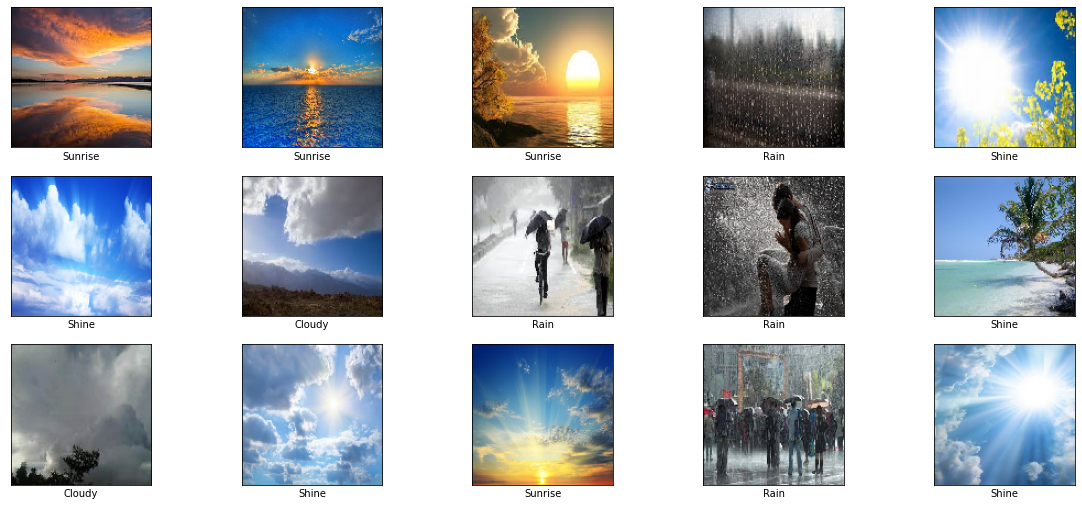

In [30]:
plt.figure(figsize=(20,15))
for i,j in zip(index_sam,range(25)):
    plt.subplot(5,5,j+1)
    plt.imshow(train_image[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[train_class[i]])
plt.show()

In [31]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_set = train_datagen.flow_from_directory(train_path,target_size=(128,128),class_mode='sparse')

Found 853 images belonging to 4 classes.


In [32]:
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_set = validation_datagen.flow_from_directory(validation_path,target_size=(128,128),class_mode='sparse')

Found 337 images belonging to 4 classes.


In [35]:
base_model = ResNet50(include_top=False,input_shape=(128,128,3))

In [36]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [37]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 5

In [38]:
base_model.trainable = False

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 5

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
hist = model.fit(train_set,validation_data=validation_set,epochs=20,verbose=1,callbacks=[es])

Epoch 1/20
27/27 [==============================] - 32s 1s/step - loss: 2.3013 - accuracy: 0.7655 - val_loss: 0.6320 - val_accuracy: 0.9139
Epoch 2/20
27/27 [==============================] - 23s 863ms/step - loss: 0.9336 - accuracy: 0.9168 - val_loss: 0.4663 - val_accuracy: 0.9436
Epoch 3/20
27/27 [==============================] - 24s 894ms/step - loss: 0.6438 - accuracy: 0.9332 - val_loss: 0.1328 - val_accuracy: 0.9674
Epoch 4/20
27/27 [==============================] - 25s 934ms/step - loss: 0.4420 - accuracy: 0.9508 - val_loss: 0.2734 - val_accuracy: 0.9644
Epoch 5/20
27/27 [==============================] - 25s 940ms/step - loss: 0.2813 - accuracy: 0.9637 - val_loss: 0.2982 - val_accuracy: 0.9644
Epoch 6/20
27/27 [==============================] - 25s 913ms/step - loss: 0.2813 - accuracy: 0.9730 - val_loss: 0.4678 - val_accuracy: 0.9585
Epoch 7/20
27/27 [==============================] - 24s 911ms/step - loss: 0.1326 - accuracy: 0.9812 - val_loss: 0.2671 - val_accuracy: 0.9644
Ep

In [63]:
test_path = r"F:\01_Dataset\01_Computer Vision\01 Weather Dataset\test"
test_image = []
test_set = []
test_class = []
path = os.listdir(test_path)
for i in range(12):
    img_path = test_path + "\\" + path[i] 
    img = load_img(img_path,target_size=(128,128))
    test_image.append(img)
    img2 = img_to_array(img)
    img2 = preprocess_input(img2)
    test_set.append(img2)
for i in range(4):
    for j in range(3):
        test_class.append(i)

In [64]:
pred_class = []
for i in test_set:
    i = np.expand_dims(i,axis=0)
    y_p = model.predict(i)
    y_p = np.argmax(y_p)
    pred_class.append(y_p)

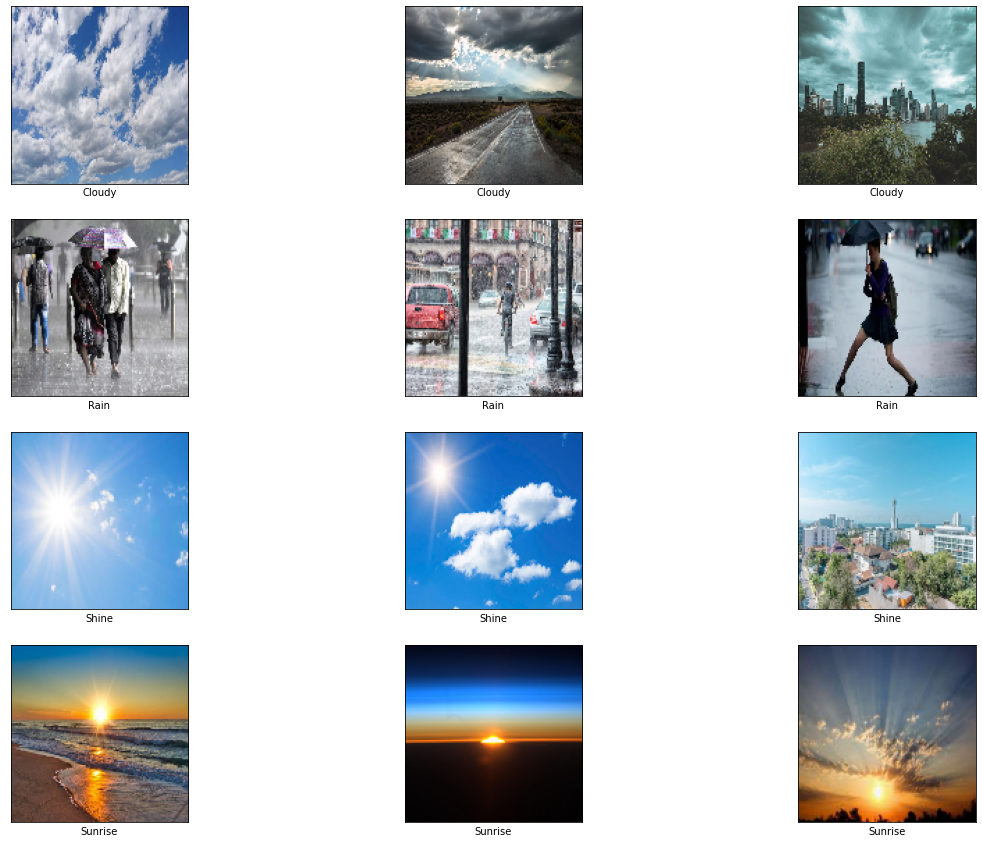

In [65]:
plt.figure(figsize=(20,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_image[i])
    plt.xlabel(classes[pred_class[i]])